In [ ]:
#Importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy 
import pandas

In [ ]:
#Read the Dataset
data=pd.read_csv('diabetes.csv')

In [ ]:
#Top 5 rows
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      0.0  26.6   
2            8    183.0           64.0            0.0      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
#Shape of the data 
data.shape

(768, 9)

In [ ]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             762 non-null    float64
 3   SkinThickness             753 non-null    float64
 4   Insulin                   737 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
#Five Point summary of the data 
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  767.000000     762.000000     753.000000  737.000000   
mean      3.845052  121.052151      69.447507      20.945551   83.156038   
std       3.369578   31.693496      18.766859      15.842004  116.452051   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   45.000000   
75%       6.000000  140.500000      80.000000      32.000000  130.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  767.000000                768.000000  768.000000  768.000000  
mean    32.034289                  0.471876   33.240885    0.348958  
std      7.804050                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#To check the missing values in the dataset
data.isnull().values.any()

True

In [ ]:
#Replace 0 to NaN so when mean is calculated zeros are not counted
d=data[['Glucose','BloodPressure','SkinThickness','BMI']]=data[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.nan)
d.head()

Glucose  BloodPressure  SkinThickness   BMI
0    148.0           72.0           35.0  33.6
1     85.0           66.0           29.0  26.6
2    183.0           64.0            NaN  23.3
3     89.0           66.0           23.0  28.1
4    137.0           40.0           35.0  43.1

In [ ]:
#To replace NaN with 0.2 for column insulin
df1=data['Insulin'].fillna('0.2')
df1.isnull().sum()


0

In [ ]:
#Find the number of Missing values
d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','BMI']]

Glucose            5
BloodPressure     37
SkinThickness    227
BMI               11
dtype: int64

In [ ]:
#Replace NaN to mean value to explore dataset
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0       35.00000      0.0  33.6   
1            1     85.0           66.0       29.00000      0.0  26.6   
2            8    183.0           64.0       29.15342      0.0  23.3   
3            1     89.0           66.0       23.00000     94.0  28.1   
4            0    137.0           40.0       35.00000    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
#To find any missing values are there or not
data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                     31
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [ ]:
#To get the number of diabetic and Healthy person
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

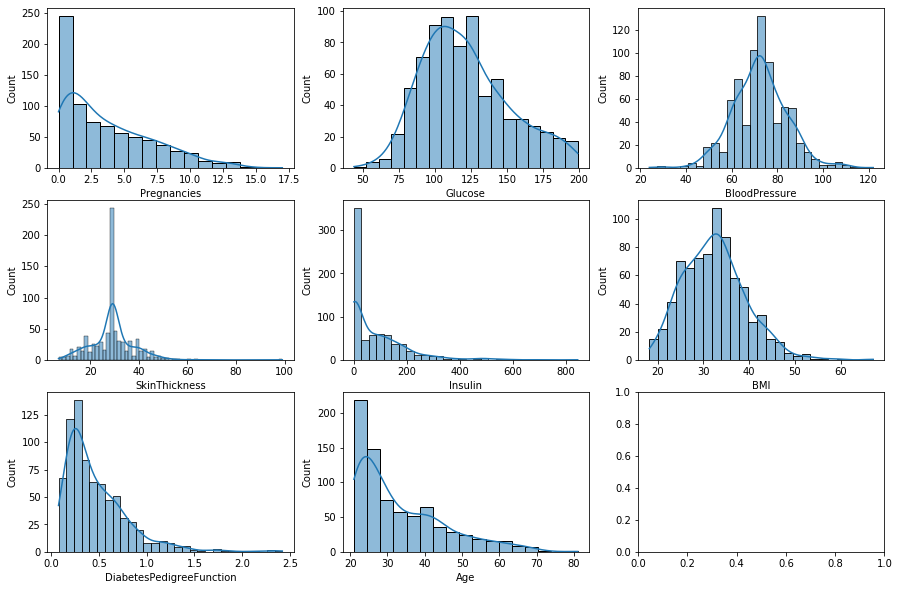

In [ ]:
fig,axes=matplotlib.pyplot.subplots(3,3, figsize = (15,10))
sns.histplot (data["Pregnancies"],kde=True, ax=axes[0,0])
sns.histplot (data["Glucose"],kde=True,ax=axes[0,1])
sns.histplot (data["BloodPressure"],kde=True, ax=axes[0,2])
sns.histplot (data["SkinThickness"],kde=True,ax=axes[1,0])
sns.histplot (data["Insulin"],kde=True, ax=axes[1,1])
sns.histplot (data["BMI"],kde=True,ax=axes[1,2])
sns.histplot (data["DiabetesPedigreeFunction"],kde=True, ax=axes[2,0])
sns.histplot (data["Age"],kde=True,ax=axes[2,1])

#matplotlib.axes.Axes.set_xlim(self=bar_p,left=0, right=20)
#matplotlib.axes.Axes.set_ylim(self=bar_p,bottom=0, top=5)


In [ ]:
# pairplot--Multiple relationship of scatterplot
sns.pairplot(data, hue='Outcome', palette=('#23C552','#C52219'))


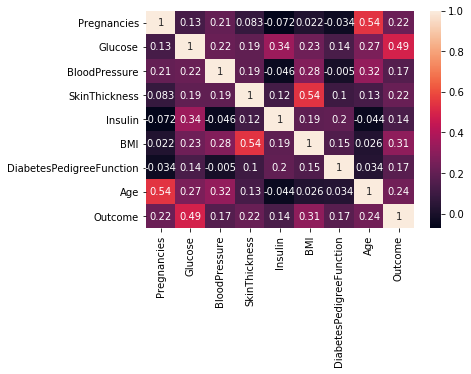

In [ ]:
# correlation plot---heatmap

sns.heatmap(data.corr(),annot=True)

In [ ]:
a=pd.Series([])
for i in data.index:
    if(data.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(data.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(data.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(data.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
data['Age']=a
data.head()

#Find the number of diabetic person in each age group

data1=data[data['Outcome']==1].groupby('Age')[['Outcome']].count()
data1
data1.head()

/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Outcome
Age           
21-24       31
25-30       59
31-40       76
41-55       85
>55         17

In [ ]:
# Percentage of diabetic Person in each age group

data2=data.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

Outcome  Diabetic %
Age                       
21-24       31   14.155251
25-30       59   29.797980
31-40       76   48.407643
41-55       85   59.027778
>55         17   34.000000

/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

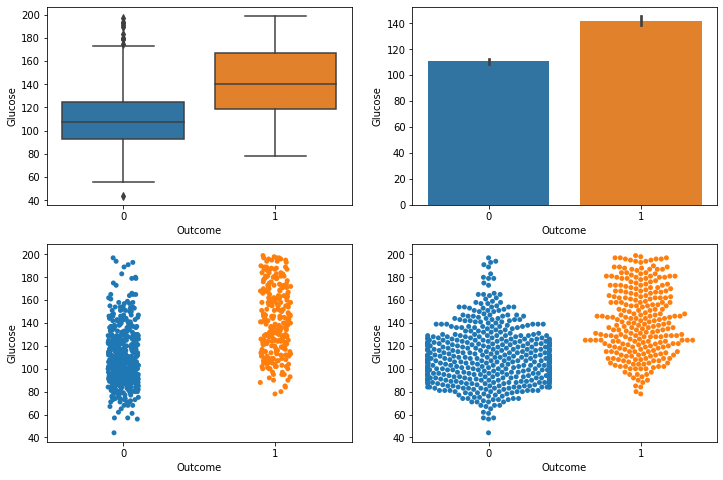

In [ ]:
#analysis of glucose parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=data,ax=ax2[0][0])
sns.barplot(data['Outcome'],data['Glucose'],ax=ax2[0][1])
sns.stripplot(data['Outcome'],data['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(data['Outcome'],data['Glucose'], ax=ax2[1][1])

/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

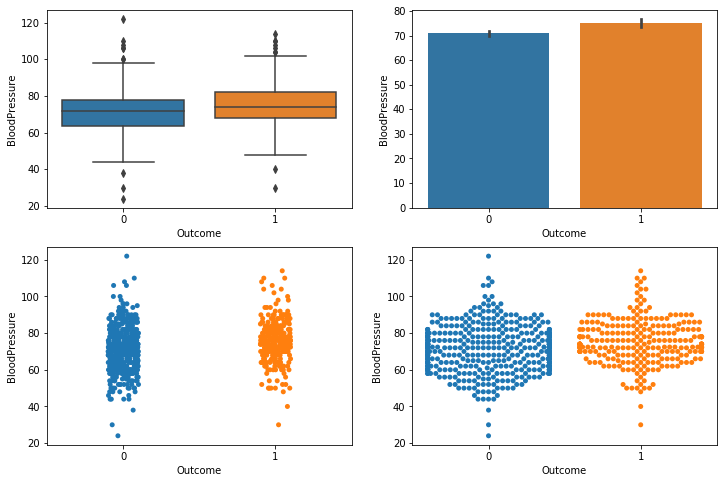

In [ ]:
#analysis of blood pressure parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=data,ax=ax2[0][0])
sns.barplot(data['Outcome'],data['BloodPressure'],ax=ax2[0][1])
sns.stripplot(data['Outcome'],data['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(data['Outcome'],data['BloodPressure'], ax=ax2[1][1])

/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

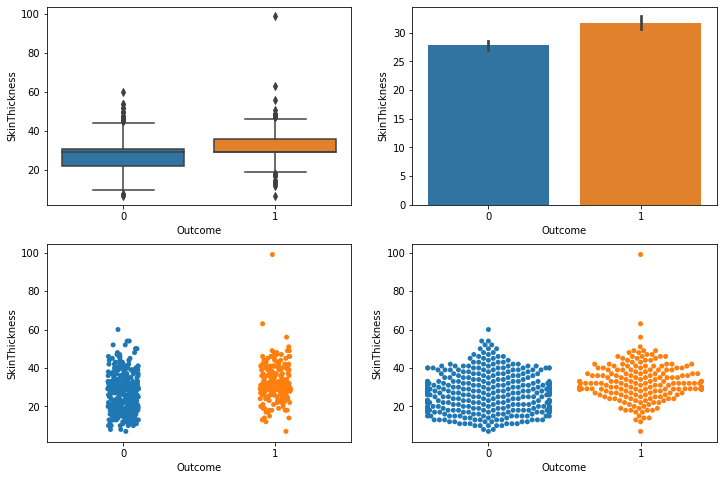

In [ ]:
#analysis of skinthickness parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=data,ax=ax2[0][0])
sns.barplot(data['Outcome'], data['SkinThickness'],ax=ax2[0][1])
sns.stripplot(data['Outcome'], data['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(data['Outcome'], data['SkinThickness'], ax=ax2[1][1])

/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

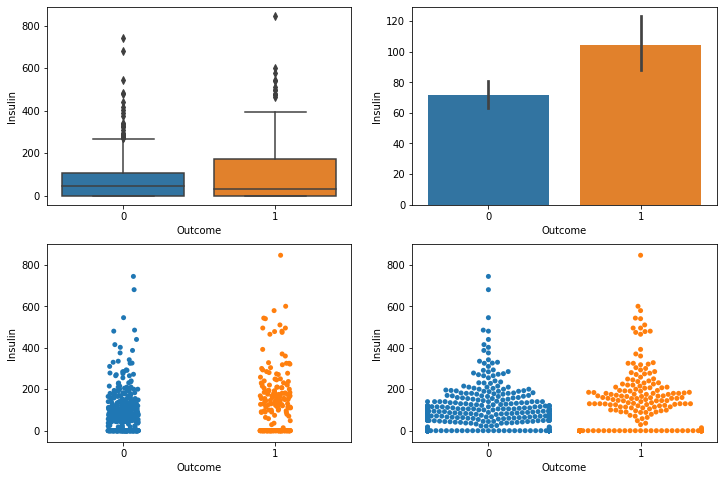

In [ ]:
#analysis of insulin parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=data,ax=ax2[0][0])
sns.barplot(data['Outcome'], data['Insulin'],ax=ax2[0][1])
sns.stripplot(data['Outcome'], data['Insulin'], jitter=True,ax=ax2[1][0])
sns.swarmplot(data['Outcome'], data['Insulin'], ax=ax2[1][1])

/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

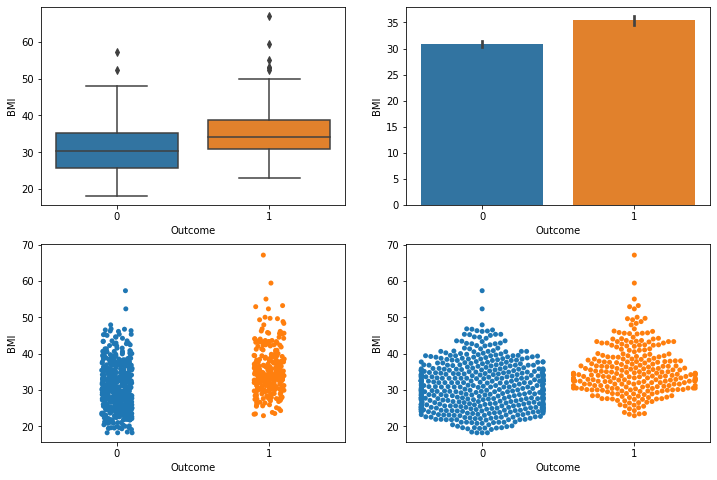

In [ ]:
# analysis of bmi parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI",data=data,ax=ax2[0][0])
sns.barplot(data['Outcome'],data['BMI'],ax=ax2[0][1])
sns.stripplot(data['Outcome'],data['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(data['Outcome'],data['BMI'], ax=ax2[1][1])

/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/chandanchaudhary/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

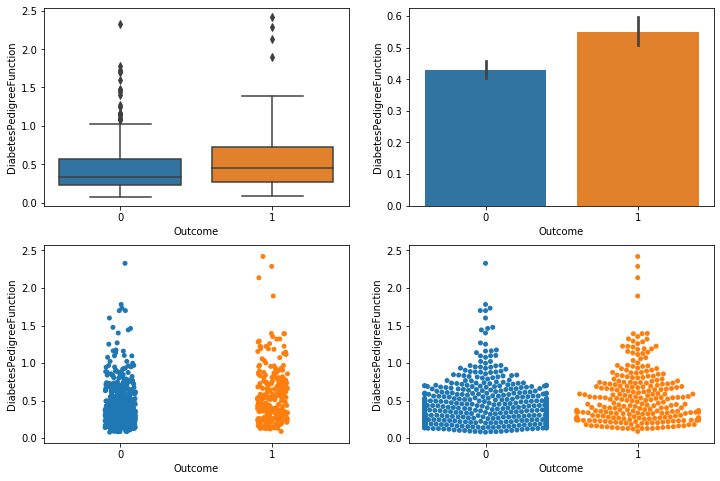

In [ ]:
# analysis of daibetespedigreefunction
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=data,ax=ax2[0][0])
sns.barplot(data['Outcome'],data['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(data['Outcome'],data['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(data['Outcome'],data['DiabetesPedigreeFunction'], ax=ax2[1][1])

# Findings